# Motivation

Goal Data Exploration. Showcase usage of different regression models to predict wine quality. Methods to improve accuracy of models

**Regression Models**:  Logistic Regression, ..., ... <br>
**Improving Accuracy**: Upsampling with SMOTE

<p align="center">
  <img src="Images/wine.jpg" width="600">

# Section I: Problem Understanding

### General Information
The data set contains 1599 red vinho verde wine taste testing results.
Each sample was evaluated by a minimum of three sensory assessors
(using blind tastes), which graded the wine in a scale that ranges from
0 (very bad) to 10 (excellent). The final sensory score is given by the
median of these evaluations [[Cortez et al., 2009, p. 2]](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub).

### Feature information 

| Feature | Unit | Description |
|:-|:-|:-|
| **fixed acidity** | g/dm³ | Fixed acidity is a measurement of the total concentration of titratable acids and free hydrogen ions.  These acids either occur naturally or are created through the fermentation process. Citric acid also falls under this category.|
| **volatile acidity** | g/dm³ | The amount of volatile acidity defines the spoilage of a wine. Some winemakers however seek a low level of this kind of acidity, to add to the perceived complexity of a wine. |
| **citric acid** | g/dm³ | Citric acids are generally found in very small quantities. They act as a preservative, are added to increase acidity or to attain a unique flavor. |
| **residual sugar** | g/dm³ | Residual Sugar describes the natural grape sugar, which is leftover after the fermentation has ended. During winemaking, yeast normally converts all sugar into alcohol, however, sometimes not all the sugar is fermented. The path to a remarkable wine is to find the perfect balance between sweetness and sourness. |
| **chlorides** | g/dm³ | Chlorides can give a wine a certain “salty taste”. Although not necessarily desirable, the right amount can give the wine an additional nuance. |
| **free sulfur dioxide** | mg/dm³ | Free sulfur dioxide is a measure of the amount of SO2 that is not bound to other molecules. Used throughout all stages of the winemaking process, it serves to prevent oxidation and microbial growth. |
| **total sulfur dioxide** | mg/dm³ | Total Sulfur Dioxide is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals. |
| **density** | g/cm³ | Monitoring the density during the fermentation allows for optimal control of the sugar conversion process into ethanol. Sweeter wines generally have a higher density. |
| **pH** | - | Winemakers are aiming for high pH levels, as high as 4.0. This makes wines taste softer. |
| **sulphates** | g/dm³ | An increase in sulphates might be related to the fermenting nutrition, which is very important to improve the wine aroma. |
| **alcohol** | vol.% | Although not unique to solely wine, alcohol is probably on of the main reasons, why mankind has enjoyed the taste of wine for millennia. |

Deducting from the information above, we can conclude some correlations, which one would expect to occur. Testing these can be a good way to see, how firm our understanding of the data is.

| feature pair | correlation |
|:-:|:-:|
| fixed acidity, pH | **-** |
| fixed acidity, citric acid | **+** |
| volatile acidity, quality | **-** |
| residual sugar, density | **+** |
| free sulfur dioxide, total sulfur dioxide | **+** |
| density, alcohol | **-** |

 ### Citation
 The used dataset is public available for research. The details are described in [[Cortez et al., 2009]](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub). The Dataset can be downloaded from the UCI Machine Learning Repository [[Source]](https://archive.ics.uci.edu/ml/datasets/wine+quality)
 <p>
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.  <br>

# Section II: Data Exploration

In [1]:
#Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing data
data = pd.read_csv('Data/winequality-red.csv', sep=';')

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#count of each target variable
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

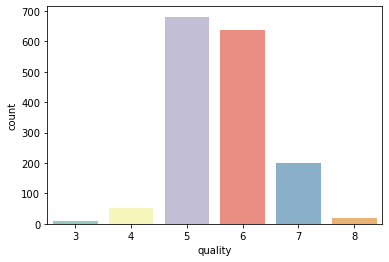

In [6]:
#count of the target variable
sns.countplot(x='quality', data = data, palette="Set3")

The mean quality with 5.6 is just barely above average. There are also no 1,2,9 or 10 quality level wines. This can also be due the test design itself with the end result being the median of three independent sensory tests.

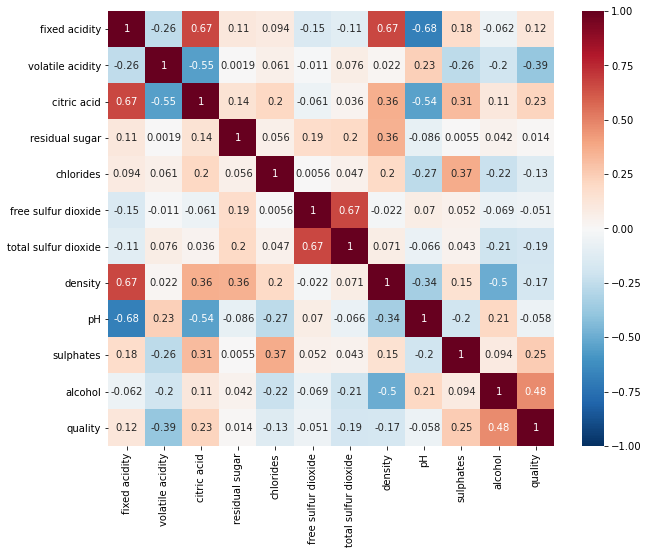

In [22]:
#Plotting correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation, annot = True, vmin = -1, cmap = "RdBu_r")

| feature pair | correlation assumption | result |
|:-:|:-:|:-:|
| fixed acidity, pH | **-** | -0.68 |
| fixed acidity, citric acid | **+** | 0.67 |
| volatile acidity, quality | **-** | -0.39 |
| residual sugar, density | **+** | 0.36 |
| free sulfur dioxide, total sulfur dioxide | **+** | 0.67 |
| density, alcohol | **-** | -0.5 |

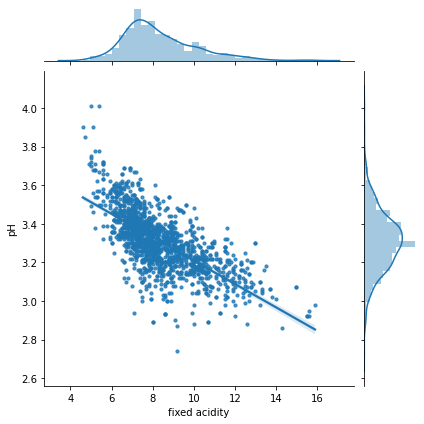

In [8]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

This scatter-plot shows how the values of pH change with changing fixed acidity levels. We can see that, as fixed acidity levels increase, the pH levels drop. Makes sense does it not? A lower pH level is, after all, an indicator of high acidity.

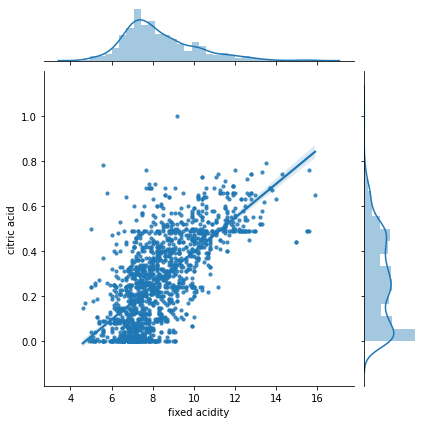

In [9]:
fixedAcidity_citricAcid = data[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

As the amount of citric acids increase, so do the fixed acidity levels.

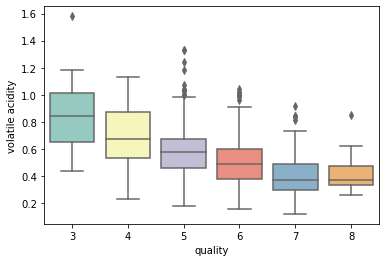

In [10]:
sns.boxplot('quality', 'volatile acidity', data = data, palette="Set3")

A higher quality is usually associated with low volatile acidity levels. This makes sense, because volatile acidity is an indicator of spoilage and could give rise to unpleasant aromas — consistent with our domain knowledge

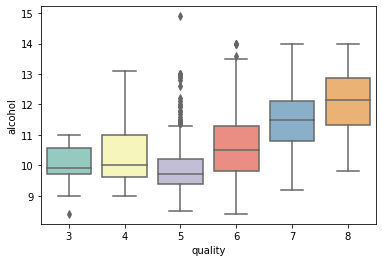

In [11]:
sns.boxplot('quality', 'alcohol', data = data, palette="Set3")

Hmm. Seems like most people generally like wines that contain a higher percentage of alcohol, ones that make them feel woozy!

Try experimenting with more features on your own in the notebook, and see if they reveal anything. If they are related in some way, what do you think might be the reason? Exploring will reveal more hidden insights.

# Section III Preprocessing Data for performing Machine learning algorithms

In [25]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [26]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [27]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [28]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [29]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

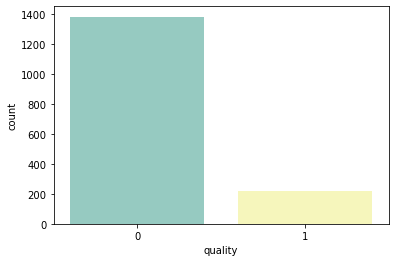

In [30]:
sns.countplot(data['quality'], palette="Set3")

In [31]:
round(data['quality'].value_counts()[0] / data['quality'].value_counts()[1], 1)

6.4

### Section IV Testing Impact of Imbalanced Data

In [32]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('quality', axis = 1)
y = data['quality']

In [33]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [34]:
X = sc.fit_transform(X)

In [35]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [37]:
#Let's see how our model performed
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



Although the accuracy of the model is quite high with **0.87**, the f1-score for the good wine class is way to low with **0.38**. Accuaracy score is heavily skewed because of the class imbalance.

### Combating Class Imbalance with the SMOTE Algorithm
To combat the class imbalance we could randomly downsample the bad wine class or randomly upsample the good wine class. In this notebook we will utilize the SMOTE algorithm (Synthetic Minority Oversampling Technique), which will synthesize new good wine entries.

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [56]:
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [57]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After  SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 1109, 1: 170})
After  SMOTE : Counter({0: 1109, 1: 1109})


In [58]:
lr.fit(X_train_smote, y_train_smote)
lr_predict_smote = lr.predict(X_test)

In [84]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, lr_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, lr_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.58        47

    accuracy                           0.81       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.81      0.83       320



Although the accuracy decreased by 6% the good wine f1-score saw an uptick by 20%. With that the reduced accuracy better reflects the real quality of the model.  

### F1-Score Intermission

To make the later comparison of the different prediction models easier and to reinforce my understanding of the underlying nature of the used metrics and their origin in the confusion matrix, i will define a little function to compute the precision, recall, f1-score and the accuracy score.  

Definition: In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). 

[[Source]](https://en.wikipedia.org/wiki/F1_score)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print(lr_conf_matrix)

[[264   9]
 [ 34  13]]


In [61]:
def model_stats (y_test, rg_predict):
    #Import packages
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import statistics 
    
    conf_matrix = confusion_matrix(y_test, rg_predict)
    output = []
    for i in range(len(lr_conf_matrix)):
        #Precision
        p = conf_matrix[i,i] / conf_matrix[:,i].sum()
        output.append(p)
        #Recall
        r = conf_matrix[i,i] / conf_matrix[i].sum()
        output.append(r)
        #F1 score
        f1_score = statistics.harmonic_mean([p,r])
        output.append(f1_score)
    
    #Accuracy score
    acc_score = np.trace(conf_matrix) / conf_matrix.sum()
    output.append(acc_score)
    
    return output

In [78]:
#Creating Dataframe for later comparison
df = pd.DataFrame(model_stats(y_test, lr_predict), columns=['lg'], 
                  index = ["Precision_0","Recall_0","F1_Score_0","Precision_1","Recall_1","F1_Score_1","Accuracy_Score"])

In [79]:
df['lg_smote'] = model_stats(y_test, lr_predict_smote)
df

,lg,lg_smote
Precision_0,0.885906,0.977376
Recall_0,0.967033,0.791209
F1_Score_0,0.924694,0.874494
Precision_1,0.590909,0.424242
Recall_1,0.276596,0.893617
F1_Score_1,0.376812,0.575342
Accuracy_Score,0.865625,0.806250


Testing addtional prediction models

### Decision Tree Classifier

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

#Decision Tree with Upsampled Data
dt.fit(X_train_smote,y_train_smote)
dt_predict_smote = dt.predict(X_test)

#Extending Model Stats DataFrame
df['dt'] = model_stats(y_test, dt_predict)
df['dt_smote'] = model_stats(y_test, dt_predict_smote)

In [80]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, dt_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, dt_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.62      0.64        47

    accuracy                           0.90       320
   macro avg       0.80      0.78      0.79       320
weighted avg       0.89      0.90      0.90       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       273
           1       0.54      0.62      0.57        47

    accuracy                           0.87       320
   macro avg       0.73      0.76      0.75       320
weighted avg       0.87      0.87      0.87       320



### Naive Bayes

In [67]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

#NaiveBayes with Upsampled Data
nb.fit(X_train_smote,y_train_smote)
nb_predict_smote = nb.predict(X_test)

#Extending Model Stats DataFrame
df['nb'] = model_stats(y_test, nb_predict)
df['nb_smote'] = model_stats(y_test, nb_predict_smote)

In [81]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, nb_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, nb_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       273
           1       0.34      0.87      0.49        47

    accuracy                           0.73       320
   macro avg       0.66      0.79      0.66       320
weighted avg       0.88      0.73      0.77       320



### Random Forest Classifier

In [69]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

#RandomForest classifier with Upsampled Data
rf.fit(X_train_smote, y_train_smote)
rf_predict_smote=rf.predict(X_test)

#Extending Model Stats DataFrame
df['rf'] = model_stats(y_test, rf_predict)
df['rf_smote'] = model_stats(y_test, rf_predict_smote)

In [82]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, rf_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, rf_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.64      0.53      0.58        47

    accuracy                           0.89       320
   macro avg       0.78      0.74      0.76       320
weighted avg       0.88      0.89      0.88       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       273
           1       0.67      0.79      0.73        47

    accuracy                           0.91       320
   macro avg       0.82      0.86      0.84       320
weighted avg       0.92      0.91      0.92       320



### SVM Classifier with rbf kernel

In [71]:
#SVM Classifier with rbf kernel
from sklearn.svm import SVC
svc_rbf = SVC()
svc_rbf.fit(X_train, y_train)
svc_rbf_predict=svc_rbf.predict(X_test)

#RSVM Classifier with Upsampled Data
svc_rbf.fit(X_train_smote, y_train_smote)
svc_rbf_predict_smote=svc_rbf.predict(X_test)

#Extending Model Stats DataFrame
df['svc_rbf'] = model_stats(y_test, svc_rbf_predict)
df['svc_rbf_smote'] = model_stats(y_test, svc_rbf_predict_smote)

In [83]:
print("\n Classification report before SMOTE (0: bad wine; 1: good wine) \n") 
print(classification_report(y_test, svc_rbf_predict))
print("\n Classification report after SMOTE (0: bad wine; 1: good wine) \n")
print(classification_report(y_test, svc_rbf_predict_smote))


 Classification report before SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320


 Classification report after SMOTE (0: bad wine; 1: good wine) 

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       273
           1       0.48      0.87      0.62        47

    accuracy                           0.84       320
   macro avg       0.73      0.86      0.76       320
weighted avg       0.90      0.84      0.86       320



# Section XX comparing model performances

In [73]:
df

,lg,lg_smote,dt,dt_smote,nb,nb_smote,rf,rf_smote,svc_rbf,svc_rbf_smote
Precision_0,0.885906,0.977376,0.934783,0.932331,0.959016,0.970000,0.921708,0.962264,0.884488,0.974468
Recall_0,0.967033,0.791209,0.945055,0.908425,0.857143,0.710623,0.948718,0.934066,0.981685,0.838828
F1_Score_0,0.924694,0.874494,0.939891,0.920223,0.905222,0.820296,0.935018,0.947955,0.930556,0.901575
Precision_1,0.590909,0.424242,0.659091,0.537037,0.486842,0.341667,0.641026,0.672727,0.705882,0.482353
Recall_1,0.276596,0.893617,0.617021,0.617021,0.787234,0.872340,0.531915,0.787234,0.255319,0.872340
F1_Score_1,0.376812,0.575342,0.637363,0.574257,0.601626,0.491018,0.581395,0.725490,0.375000,0.621212
Accuracy_Score,0.865625,0.806250,0.896875,0.865625,0.846875,0.734375,0.887500,0.912500,0.875000,0.843750


In [76]:
df_highlight = df.drop(['Precision_0', 'Recall_0', 'Precision_1', 'Recall_1'])

In [77]:
df_highlight.style.highlight_max(axis=1)

,lg,lg_smote,dt,dt_smote,nb,nb_smote,rf,rf_smote,svc_rbf,svc_rbf_smote
F1_Score_0,0.924694,0.874494,0.939891,0.920223,0.905222,0.820296,0.935018,0.947955,0.930556,0.901575
F1_Score_1,0.376812,0.575342,0.637363,0.574257,0.601626,0.491018,0.581395,0.725490,0.375000,0.621212
Accuracy_Score,0.865625,0.806250,0.896875,0.865625,0.846875,0.734375,0.887500,0.912500,0.875000,0.843750


Findings and further thoughts:
 - Random Forest Classifier with upsampeled data returns the best prediction results.
 - Upsampling the data actually decreasis the prediction quality of the naive bayes 

# Future Questions

 - Testing additional prediction models 
 - Outlier detection and impact on results